# Import necessary libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

## Load the datasheet

In [19]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets #(target variable heart disease)

df = X.copy()
df['TARGET'] = y
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,TARGET
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [20]:
# Convert TARGET Who has heart disease
df['TARGET'] = df['TARGET'].apply(lambda x: 0 if x == 0 else 1)

# Check
df[['TARGET']].value_counts()


TARGET
0         164
1         139
Name: count, dtype: int64

## Check for null value

In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
TARGET      0
dtype: int64

## Removing Null value

In [22]:
df = df.dropna()

## check data sheet info

In [23]:
df.info()
DF = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  TARGET    297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,TARGET
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


# Explotary Data analysis

## Corelation

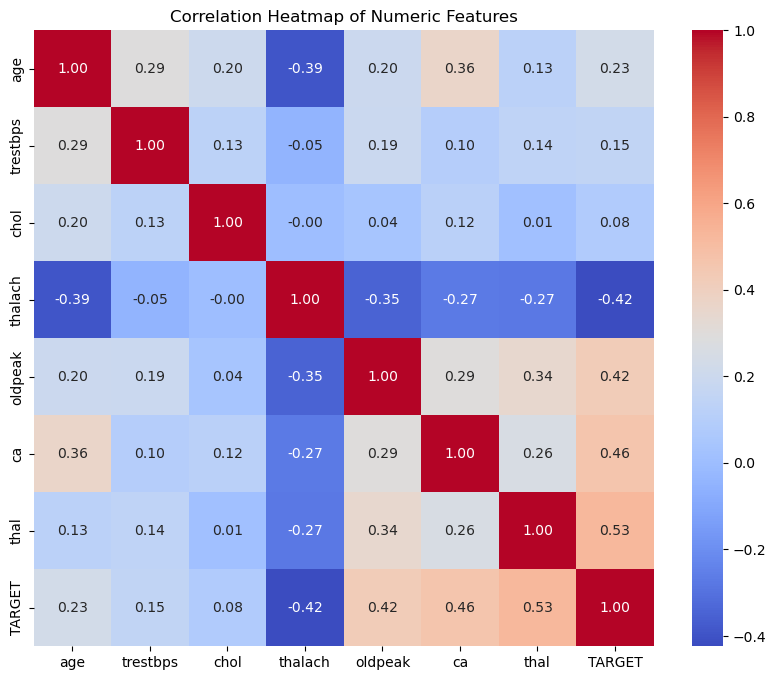

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal','TARGET']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


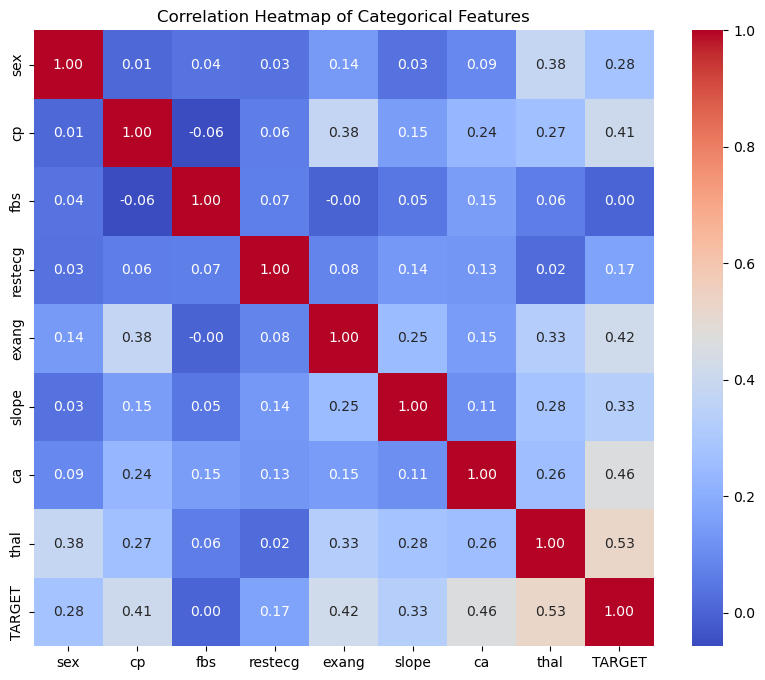

In [ ]:
import pandas as pd

# Select only categorical columns
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'TARGET']
corr = df[cat_cols].corr()
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Categorical Features')
plt.show()


## Boxplot

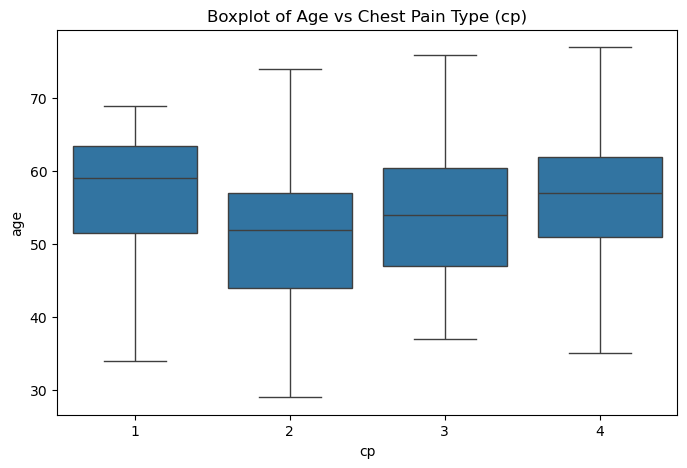

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot of 'age' vs 'cp' (chest pain type)
plt.figure(figsize=(8,5))
sns.boxplot(x='cp', y='age', data=df)
plt.title('Boxplot of Age vs Chest Pain Type (cp)')
plt.show()


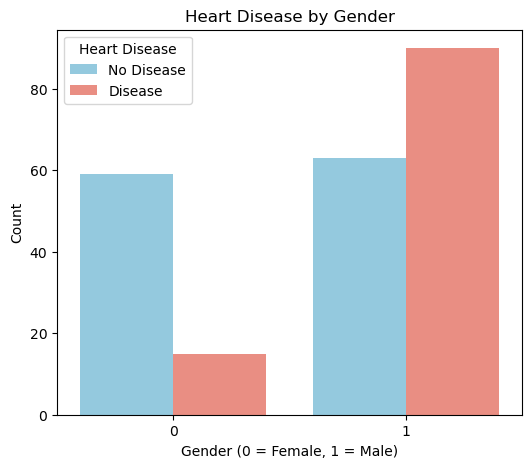

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.countplot(x='sex', hue='TARGET', data=df, palette=['skyblue','salmon'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


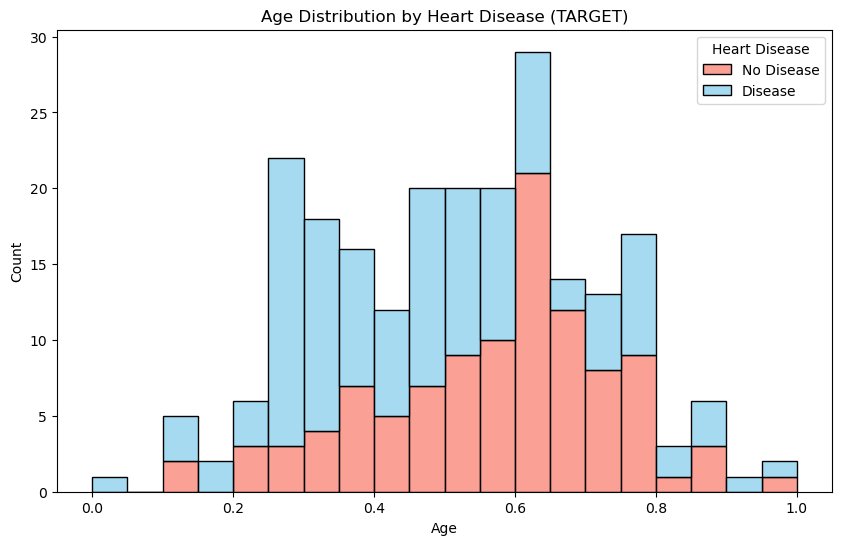

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Histogram of age by TARGET
sns.histplot(data=df, x='age', hue='TARGET', multiple='stack', bins=20, palette=['skyblue','salmon'])
plt.title('Age Distribution by Heart Disease (TARGET)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


## OUTLIER removing

In [30]:
numeric_cols = df.select_dtypes(include=[int]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outlier_values = df[col][(df[col] < lower_limit) | (df[col] > upper_limit)]
    #outlier value
    print(f"Outliers in column '{col}': {list(outlier_values)}")
    #outlier removing
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

print("Shape after removing outliers:", df.shape)

Outliers in column 'age': []
Outliers in column 'sex': []
Outliers in column 'cp': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers in column 'trestbps': [172, 180, 200, 174, 192, 180, 178, 180]
Outliers in column 'chol': [417, 407, 564, 394, 409]
Outliers in column 'fbs': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers in column 'restecg': []
Outliers in column 'thalach': [71]
Outliers in column 'exang': []
Outliers in column 'slope': []
Outliers in column 'TARGET': []
Shape after removing outliers: (227, 14)


## Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns to normalize
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = MinMaxScaler()

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

# Check normalized values
df[num_cols].head()


,age,trestbps,chol,thalach,oldpeak
1,0.791667,0.868421,0.676856,0.175439,0.241935
2,0.791667,0.342105,0.427948,0.359649,0.419355
3,0.166667,0.473684,0.519651,0.868421,0.564516
4,0.250000,0.473684,0.318777,0.736842,0.225806
5,0.562500,0.342105,0.458515,0.789474,0.129032


## Feature selection

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Assuming your DataFrame is named df
# List of categorical features (columns that are integers but represent categories)
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Encode categorical features (if not already numeric)
X_cat = df[categorical_cols].copy()
le = LabelEncoder()
for col in categorical_cols:
    X_cat[col] = le.fit_transform(X_cat[col])

# Target
y = df['TARGET']

# Chi-Square test
chi_scores, p_values = chi2(X_cat, y)

# Create DataFrame to display results
chi_df = pd.DataFrame({'Feature': categorical_cols, 'Chi2 Score': chi_scores, 'p-value': p_values})
chi_df = chi_df.sort_values(by='Chi2 Score', ascending=False)

print("Chi-Square Feature Importance:")
print(chi_df)


Chi-Square Feature Importance:
   Feature  Chi2 Score       p-value
6     thal   86.466151  1.421496e-20
5       ca   71.721083  2.478700e-17
3    exang   29.138362  6.738934e-08
1       cp   22.149049  2.522809e-06
4    slope   18.289385  1.897616e-05
0      sex    9.721380  1.821367e-03
2  restecg    9.514428  2.038627e-03


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

# Features
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

X = df[num_cols + cat_cols]

# Make TARGET

y = df['TARGET']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (optional)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit LassoCV
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Create DataFrame with all features and coefficients
lasso_df = pd.DataFrame({
    'Feature': num_cols + cat_cols,  # all features
    'Coefficient': lasso.coef_
})

# Sort by absolute value of coefficient
lasso_df['abs_coef'] = lasso_df['Coefficient'].abs()
lasso_df = lasso_df.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef').reset_index(drop=True)

# Print results
print("Lasso Feature Importance:")
print(lasso_df)


Lasso Feature Importance:
     Feature  Coefficient
0       thal     0.163608
1         ca     0.142116
2         cp     0.073331
3      exang     0.051004
4        sex     0.043134
5      slope     0.035315
6    restecg     0.034580
7    oldpeak     0.026837
8    thalach    -0.016258
9       chol     0.004288
10       age     0.000487
11  trestbps     0.000000
12       fbs     0.000000


## the dataset with selected features

In [38]:
selected_features = ['thal', 'ca', 'cp', 'exang', 'sex', 'slope', 'restecg', 'oldpeak', 'thalach']  # based on Lasso
X_selected = df[selected_features]
y = df['TARGET']

## split dataset